#**Project (Wine Classification): Summary-**
***In this Project we are going to classify the Wine category whether it's White or Red from Dataset which we extract from Kaggle. So, here we have classify (Red = 0) and (White =1). Also we are creating a Model with the help of some algorithm we are going to check the accuracy level of Model Prediction and we extract this dataset from source:- https://www.kaggle.com/shelvigarg/wine-quality-dataset. Also with this Model we can predict new dataset easily and refer to available class.***



# ***: Importing important libraries and Loading dataset-***


*   **Pandas:- Here we are using 'Pandas' Library for EDA and Preprocessing purpose.**
*   **Matplotlib:- Also we are using 'Matplotlib' for Data Visualization purpose.**
*   **Seaborn:- 'Seaborn' is popular and advanced library for visualize the dataset in more convenient and easily way. So, we are using it in this Project for better understanding about Dataset.**





In [1]:
# Importing important Librabries.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading dataset and printing first 5 'rows'.

df = pd.read_csv('winequalitycheck.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# ***EDA:-***    **Here we are preprocessing the Data.**

In [3]:
# Checking the information about data type and available columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Checking if any Null value available.

df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
# Filling up the Null value with 'mean' and 'median' method.

df['fixed acidity'].fillna(df['fixed acidity'].median(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].median(), inplace=True)
df['citric acid'].fillna(df['citric acid'].median(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].median(), inplace=True)
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].median(), inplace=True)


In [6]:
# Again checking Null value for make sure there's not any available Null value.

df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

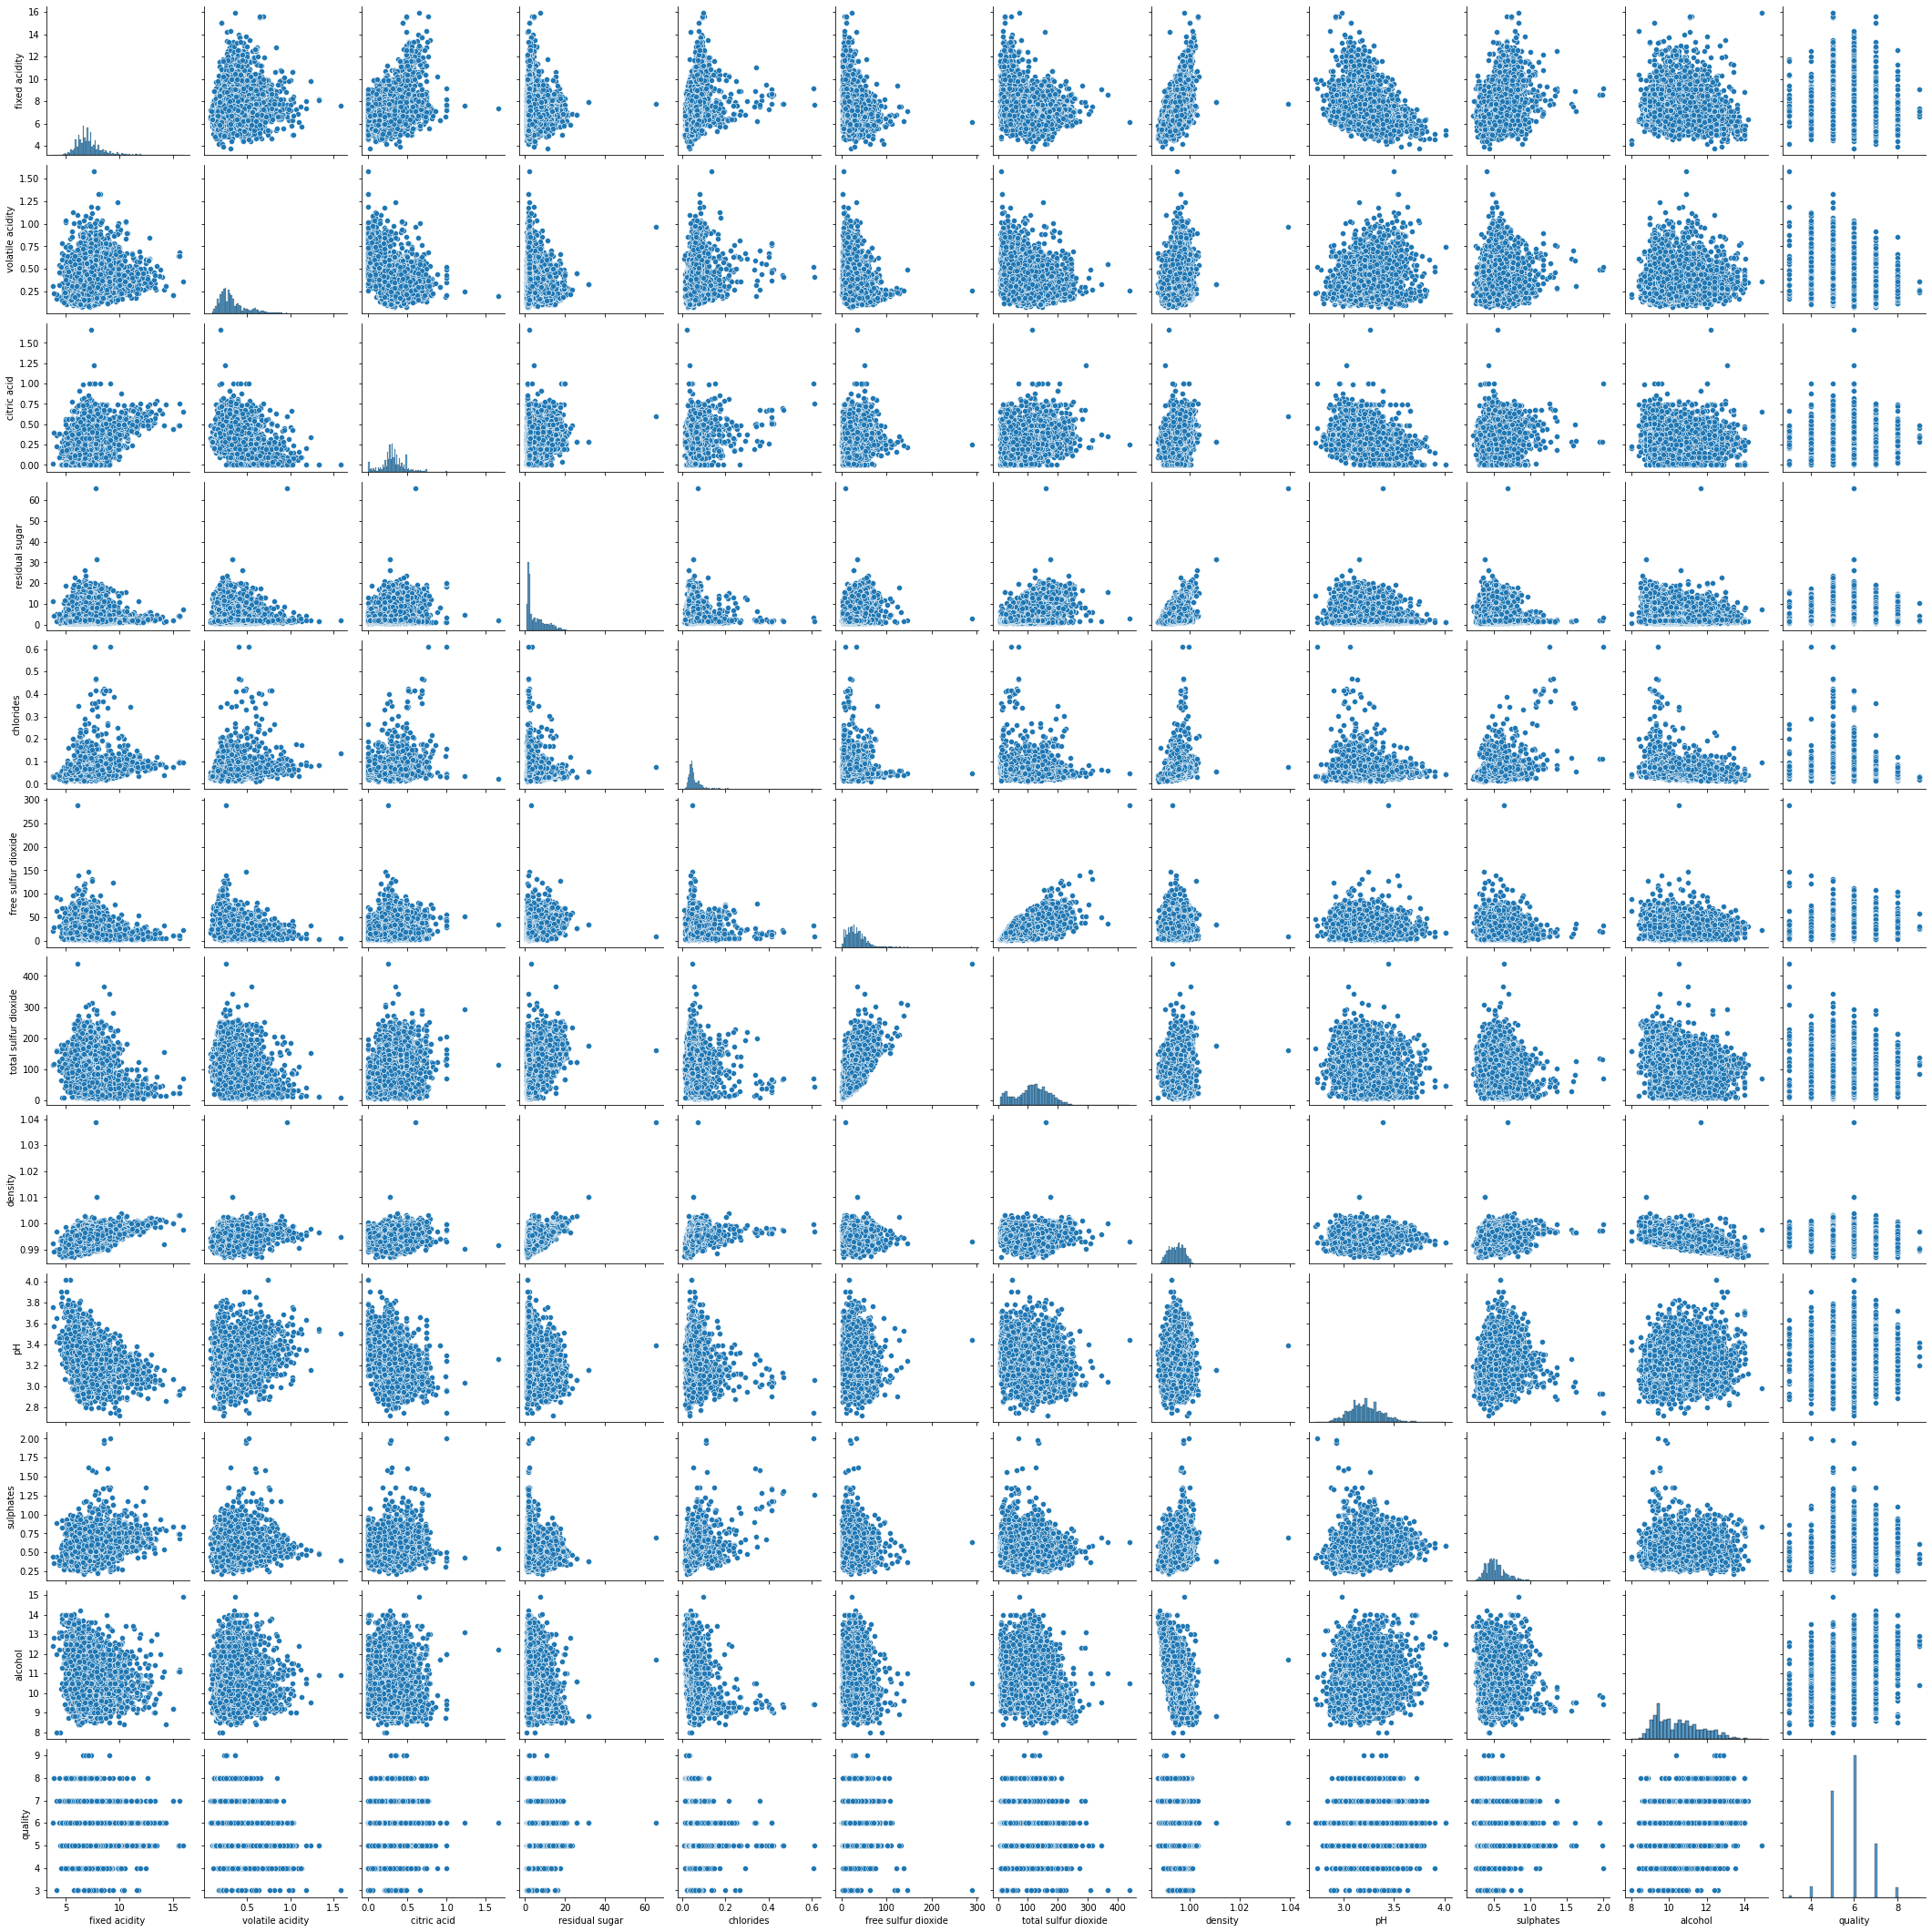

In [7]:
# Visualizing dataset with the help of 'Seaborn' library.

sns.pairplot(df)

In [8]:
# Checking the available 'wine type' category there.

df.type.unique()

array(['white', 'red'], dtype=object)

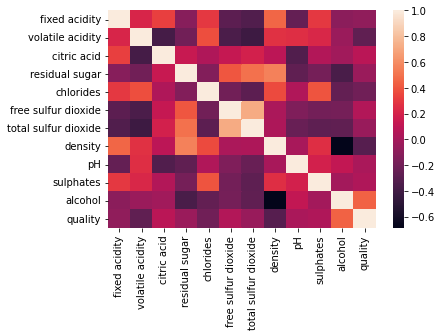

In [9]:
# Checking the correlation between 'featuers' and 'label' column.

corr = df.corr()
sns.heatmap(corr)

In [10]:
# Separating all the features (X) columns in New Dataset and printing it here.

New_Dataset = df.iloc[:,1:]
New_Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
# Here we are converting categorical 'label' to binary form in 0 and 1. Also it's mentioned 0 as red and 1 as white.

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
labelencoded_column = df
labelencoded_column.type = labelencoder.fit_transform(labelencoded_column.type)
labelencoded_column

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
# We are passing (X) features to 'New_Dataset' and printing it here.

X = New_Dataset
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
# We are fetching 'label' (y) from 'labelencoded_column' where we have converted categorical data in binary form. Also we are Printing 'label' (y) here.

y = labelencoded_column.type
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [14]:
# Importing 'train_test_split' from sklearn and splitting training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Printing training data here.

print(X_train)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
5372           10.5             0.280         0.51  ...       0.89      9.4        6
1790            9.4             0.160         0.30  ...       0.46      9.1        5
5879            9.5             0.860         0.26  ...       0.62     10.0        5
1065            8.3             0.220         0.38  ...       0.50      9.7        5
852             6.9             0.180         0.36  ...       0.95      9.5        7
...             ...               ...          ...  ...        ...      ...      ...
4931            6.9             0.605         0.12  ...       0.52      9.4        6
3264            5.9             0.240         0.12  ...       0.44      9.6        6
1653            7.9             0.330         0.28  ...       0.38      8.8        6
2607            8.9             0.260         0.33  ...       0.46     10.8        6
2732            7.9             0.510         0.34  ...       0.5

In [16]:
# Printing testing data.

print(X_test)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
5316           11.9              0.38         0.51  ...       0.76     10.4        6
5210            9.0              0.46         0.31  ...       0.63      9.5        6
3518            7.5              0.20         0.41  ...       0.52     11.1        5
1622            6.5              0.44         0.49  ...       0.37      8.7        6
2443            6.6              0.32         0.33  ...       0.60     10.0        5
...             ...               ...          ...  ...        ...      ...      ...
5710           10.8              0.45         0.33  ...       0.71     10.8        5
6475            6.2              0.70         0.15  ...       0.60     11.9        6
1433            7.1              0.29         0.49  ...       0.33     12.2        6
2707            6.5              0.23         0.36  ...       0.41      8.8        5
2887            6.4              0.20         0.28  ...       0.5

In [17]:
# here we needs to do feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


***> Using KNN Classifier algorithm here.***

In [18]:
# importing 'KNeighborsClassifier' and classification metrics from 'sklearn' Library. 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
# selecting the K value.

acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

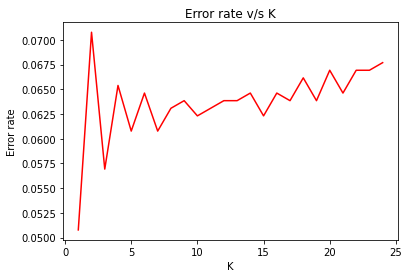

In [20]:
# Plotting the 'K value' and 'Error rate' with the help of matplotlib.

plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [21]:
# So here we are doing Model building. Also selecting 'k value = 1' because you can see on k value = 1 the error rate is very low.

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [22]:
# Here we are evaluating the Model.

confusion_matrix(y_test,y_pred)

array([[289,  36],
       [ 30, 945]])

In [23]:
# Checking the acuracy level of our Model.

accuracy_score(y_test,y_pred)

0.9492307692307692

***> Using 'Logistic Regression' algorithm here.***

In [24]:
# Importing 'LogisticRegression' from sklearn and creating a model building.

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()


In [25]:
# Fitting model with training data

reg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Predicting the Model

reg.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1])

In [27]:
# checking the accuracy score there

reg.score(X_test, y_test)


0.9730769230769231

***> Using 'DecisionTreeClassifier' algorithm here.***

In [28]:
# Importing 'Decision Tree' from sklearn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Creating a Model in Decision Tree and then fitting it.

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# Checking the accuracy score on Test Data.

model.score(X_test, y_test)

0.9846153846153847

***> Using 'RandomForestClassifer' algorithm here.***

In [31]:
# Importing ensemble and then 'RandomforestClassifier' from sklearn and creating a variable.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [32]:
# Fitting model.

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# Predicting the model on test dataset.

y_pred = model.predict(X_test)

In [34]:
# checking the accuracy score.

model.score(X_train,y_train)


0.9998075812969021

***> Using 'SupportVectorMachine Classifer' Algorithm here.***

In [35]:
# Importing Support Vector Machine and using 'Classifier' from there. 

from sklearn.svm import SVC

In [36]:
# Creating a Class with and and using support vector classifier on that.

support_vector_classifier = SVC(C=70.0)


In [37]:
# Fitting up the Model on training dataset.

support_vector_classifier.fit(X_train, y_train)


SVC(C=70.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
# Checking the acccuracy score if test data set.

support_vector_classifier.score(X_test, y_test)

0.9523076923076923

## ***Conclusion:-***

### **So In this Project we have used several algorithm to classify whether the available features are predicting Wine Category is Red or White.**

***- We got 94% accuracy level of prediction from 'KNN Classifier' algorithm.***

***- We got 97% accuracy level of prediction from 'Logistic Regression' algorithm.***

***- We got 98% accuracy level of prediction from 'DecisionTree Classifier' algorithm.***

***- We got 99% accuracy level of prediction from 'RandomForest Classifier' algorithm.***

***- We got 95% accuracy level of prediction from 'SupportVectorMachine Classifier' algorithm.***

## **** As we are getting high accuracy level from 'RandomForest Classifier'. So we'll prefer this algorithm as Prior.*** 